# Cross-Validation Lesson

---

### Learning Objectives
- **Describe** train/test split and cross-validation.
- **Explain** how these validation techniques differ and why we want to use them.
- **Split** data into testing and training sets using both train/test split and cross-validation and **apply** both techniques to score a model.

### Lesson Guide
- [Overfitting and Underfitting](#overfitting-underfitting)
- [Train/Test Split](#train-test-split)
- [K-Fold Cross-Validation](#cross-val-k-fold)
- [Train/Test Split Demonstration](#demo)
    - [Plot a Heatmap](#heatmap)
    - [Select a Single Predictor for an SLR](#single-predictor)
    - [Split Data Into Training and Testing](#sklearn-tts)
    - [Fit on the Training Data](#fit-on-train)
- [K-Fold Cross-Validation Demonstration](#cv-demo)
- [Review: Negative $R^2$ Values](#neg-r2)
- [Hold-out Sets](#hold-out)
- [Additional Resources](#additional-resources)

<a id='overfitting-underfitting'></a>

## Overfitting and Underfitting

---

![](http://tomrobertshaw.net/img/2015/12/overfitting.jpg)


**What's wrong with the first model?**
- The underfit model falls short of capturing the complexity of the "true model" of the data.

**What's wrong with the third model?**
- The overfit model is too complex and is modeling random noise in the data.

**The middle model is a good compromise.**
- It approximates the complexity of the true model and does not model random noise in our sample as true relationships.

![](http://image.slidesharecdn.com/nncollovcapaldo2013-131220052427-phpapp01/95/machine-learning-introduction-to-neural-networks-12-638.jpg?cb=1393073301)

<a name="train-test-split"></a>
## Train/Test Split and Model Validation

---

So far we've focused on fitting the best model to our data. But is this the best model for our sample data or the best model overall? How do we know?

In practice we need to validate our model's ability to generalize to new data. One popular method for performing model validation is by splitting our data into subsets: data on which we *train* our model and data on which we *test* our model.

The most basic type of "hold-out" validation is called **train/test split**. We split our data into two pieces:

> **"A Training Set":** The subset of the data on which we fit our model.

> **"A Testing Set":** The subset of the data on which we evaluate the quality of our predictions.


**Train/Test Split Benefits:**

- Testing data can represent "future" data; for prediction-oriented models, it's critical to ensure that a model that is performing well on current data will likely perform well on future data.
- It can help diagnose and avoid overfitting via model tuning.
- It can improve the quality of our predictions.

<a id='cross-val-k-fold'></a>

## K-Fold Cross-Validation

---

K-fold cross-validation takes the idea of a single train/test split and expands it to *multiple tests* across different train/test splits of your data.

For example, if you determine your training set will contain 80 percent of the data and your testing set will contain the other 20 percent, you could have five different 80/20 splits in which the test set in each is a different set of observations. We have:
- Five (K=5) training sets.
- Five (K=5) corresponding testing sets.

**K-fold cross-validation builds K models — one for each train/test pair — and evaluates those models on each respective test set.**

### K-Fold Cross-Validation Visually

<img src="https://snag.gy/o1lLcw.jpg?convert_to_webp=true" width="500" />

---

Cross-validation helps us understand how a model parameterization may perform in a variety of cases. The k-fold cross-validation procedure can be described in pseudocode:

```
set k
create k groups of rows in data

for group i in k row groups:
    test data is data[group i]
    train data is data[all groups not i]
    
    fit model on train data
    
    score model on test data
    
evaluate mean of k model scores
evaluate variance of k model scores
```

**Question:  Which is better, a test / train split of 50/50 or a K-Folds of 2?**

Odd case:
> **When K=number of rows**: This is known as "leave-one-out cross-validation," or LOOCV. A model is built on all but one row and tested on the single excluded observation.

<a id='demo'></a>

## Train/Test Split With Scikit-Learn Demonstration

---

Let's use scikit-learn to load everyone's favorite data set: the Boston housing data.

In [0]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [0]:
# A:
data = datasets.load_boston()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
for key, value in data.items():
    print(key, value[0])

data [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
target 24.0
feature_names CRIM
DESCR .
filename /


In [5]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
data.target.shape

(506,)

In [7]:
data.data.shape

(506, 13)

In [8]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
df = pd.DataFrame(data.data,  columns=data.feature_names)

In [0]:
df['MEDV'] = data.target

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
df.shape

(506, 14)

#### Show a ranked list of  top coorelated features for the variable "MEDV"

In [13]:
df.corr().abs().MEDV.sort_values(ascending = False)[1:]

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

### Plot a Heatmap of the Correlation Matrix

Heatmaps are an effective way to visually examine the correlational structure of your predictors. 

> Keep in mind that Pearson correlation between non-dummy-coded categorical variables and other variables is invalid.

Let's lift some code from GitHub's Gist to plot a correlation heatmap.

[Ryan's Heatmap Cheat Sheet](https://gist.github.com/rddunlap23/02d4014907ffaf9cbdf49f4004f82ba6)

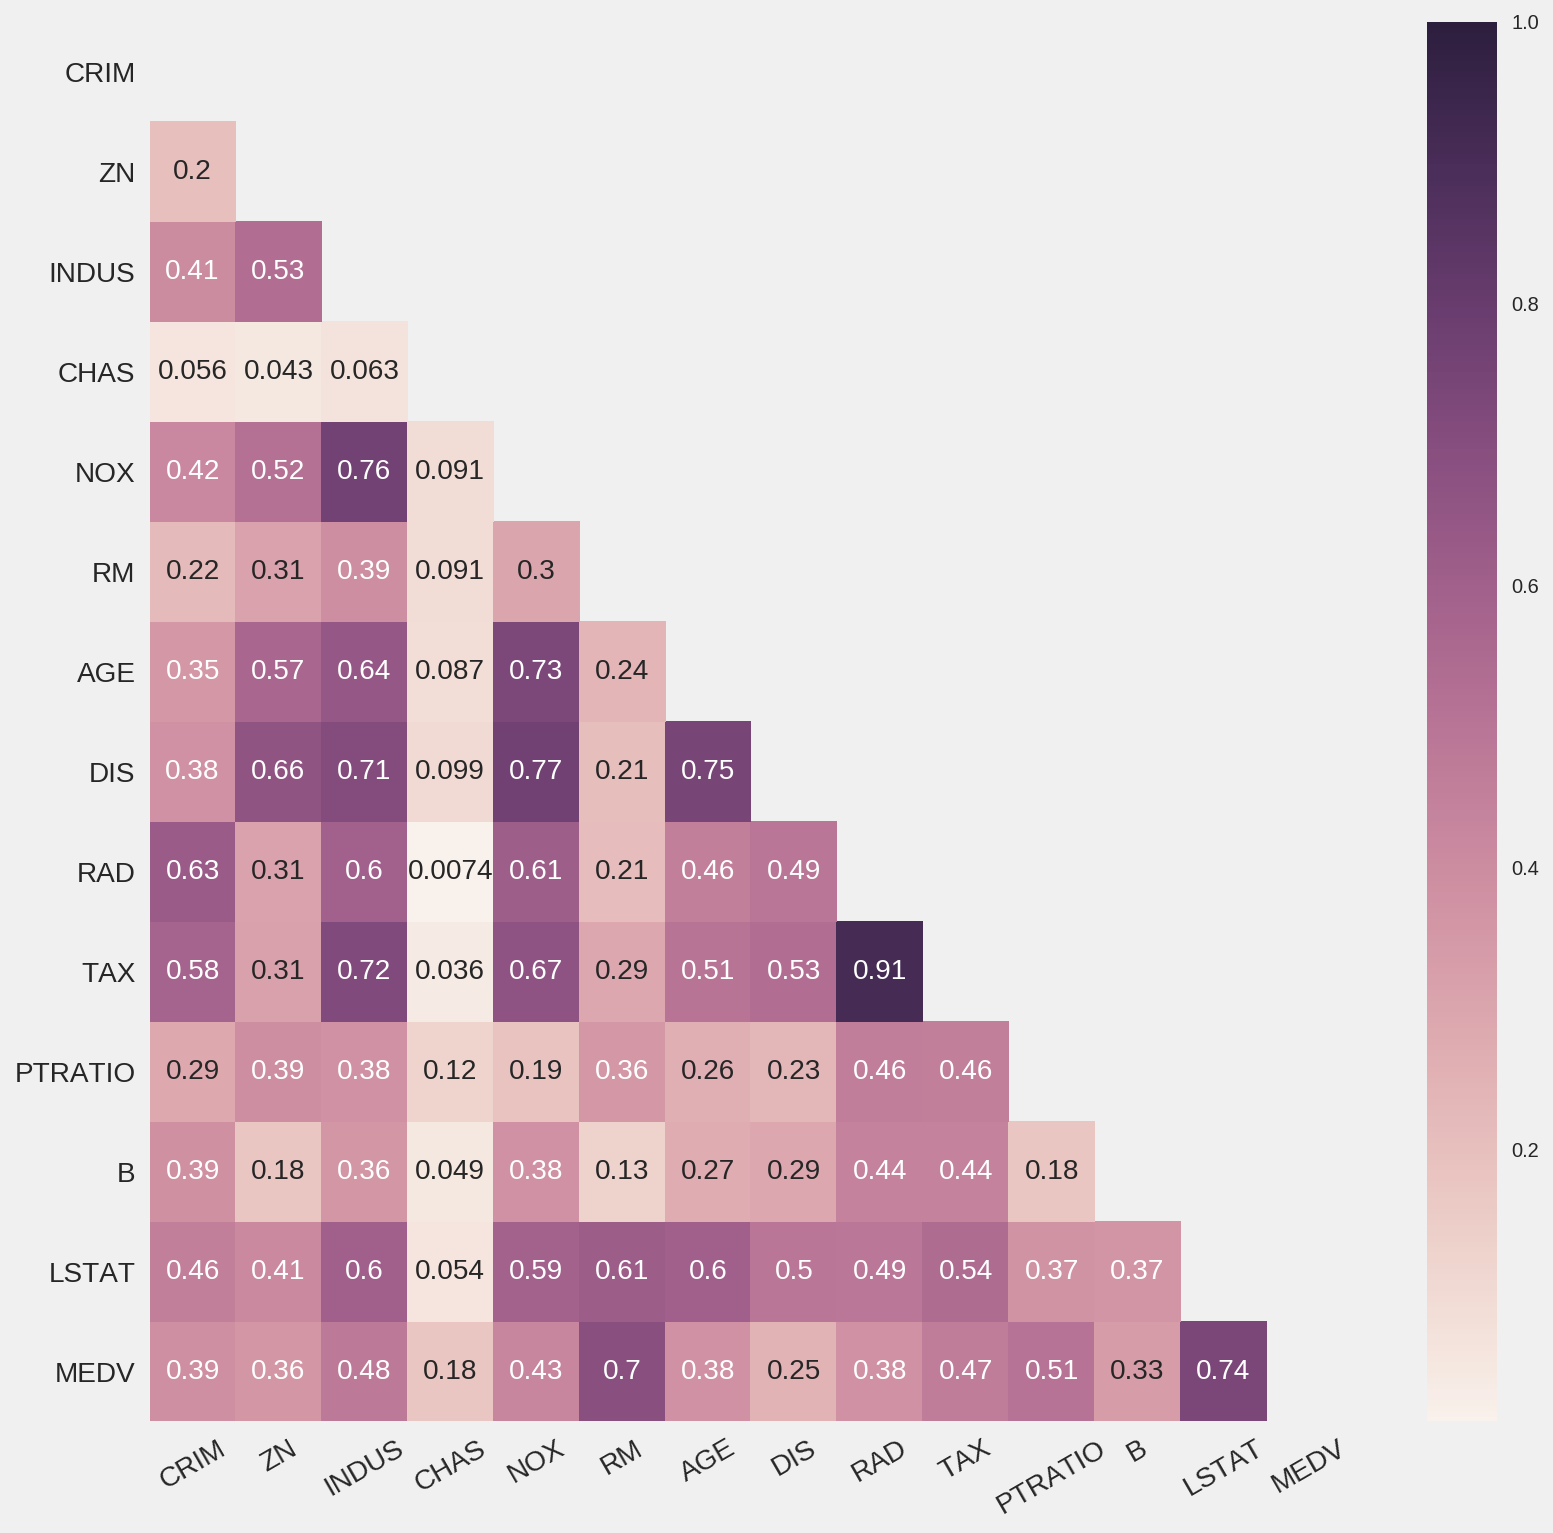

In [14]:
# A:
def correlation_heat_map(df):
    corrs = df.corr().abs()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

y=df.MEDV
df_with_target = df.copy()
df_with_target['MEDV'] = y

correlation_heat_map(df_with_target)

What features are most correlated to 'MEDV'?    
Answer: 

<a id='sklearn-tts'></a>

### Scikit-Learn's `train_test_split` Function

Performing train/test splits using scikit-learn is easy — load the `train_test_split` function:

```python
from sklearn.model_selection import train_test_split
```

**Arguments**:
- *Arrays*: Any number of arrays/matrices to split up into training and testing sets (they should be the same length).
- `test_size`: An integer representing the exact size of the testing subset or a float for a percentage.
- `train_size`: Alternatively, you can specify the training size.
- `stratify`: Supply a vector to stratify the splitting (by more important classification tasks).

**Perform a 70-30 split of our `X` and `y`.**

In [15]:
df[data.feature_names].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# A:
X_train, X_test, y_train, y_test = \
           train_test_split(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']], df['MEDV'], \
                            random_state = 42, test_size = 0.3)


<a id='fit-on-train'></a>

### Fit a Linear Regression on the Training Set

Using the training `X` and training `y`, we can fit a linear regression with scikit-learn's `LinearRegression`.

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
# A:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

<a id='score-on-test'></a>

### Calculate the $R^2$ Score on the Testing Data

After we've constructed our model on the training set, we can evaluate how well it performs on data that it's had no exposure to.

In [20]:
# A:
model.score(X_train, y_train)

0.7434997532004697

**Compare this to how the model scored on the training set.**

In [21]:
# A:
model.score(X_test, y_test)

0.7112260057484874

<a id='cv-demo'></a>

## K-Fold Cross-Validation Demonstration

---


Now let's try out k-fold cross-validation. Again, scikit-learn provides useful functions to do the heavy lifting. 

The function `cross_val_score` returns the $R^2$ for each testing set. 

Alternatively, the function `cross_val_predict` returns the predicted values for each data point when it's in the testing slice.


In [22]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

X = df[['RM', 'LSTAT', 'TAX']].copy()
y = df['MEDV']

# Use the KFold class to add more options.
kf_shuffle = KFold(n_splits=5,shuffle=True)
#kf_stra_shuffle = StratifiedKFold(n_splits=5,shuffle=True)
scores = cross_val_score(lm, X_train, y_train, cv=kf_shuffle)

print("Mean of scores:", np.mean(scores))
print("STD of scores:", np.std(scores))      
print("Scores:", scores)

Mean of scores: 0.7032780677043929
STD of scores: 0.03963498027276627
Scores: [0.69405156 0.68543788 0.73064203 0.7610191  0.64523977]


<a id='hold-out'></a>

## Hold-Out Sets

---

Hold-out sets are a version of train/test split. To create a hold-out set, you:

1. **Split data into a large training and a small testing set. This small testing set will be the "hold-out" set.**
1. **For a set of different model parameterizations:**
    1. **Set up the model.**
    1. **Cross-validate the current model on the training data.**
    1. **Save the model performance.**
1. **Select the model that performed best using cross-validation on the training data.**
1. **Perform a final test of that model on the original "hold-out" test set.**

> **Note:** The "hold-out" method is more conservative, but also requires you to have more data. With smaller data sets it can be infeasible.

The graphic below explains the hold-out method visually:

![](./assets/Train-Test-Split-CV.png)

<a id='additional-resources'></a>

## Additional Resources

---

- [Cross-Validation Example](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py).
- [Plotting Cross-Validated Predictions](http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html).
- Review this [academic paper](http://frostiebek.free.fr/docs/Machine%20Learning/validation-1.pdf) on the underpinnings of the hold-out method, LOOVC, and k-folds.
- Review the scikit-learn [documentation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) on cross-validation.
- Review this [Stanford lesson](https://www.youtube.com/watch?v=_2ij6eaaSl0) on cross-validation.
- Review this [blog post](http://www.win-vector.com/blog/2015/01/random-testtrain-split-is-not-always-enough/) on why TTS is not always sufficient.